In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#Uyarı kapatma
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Veri okuma
veri= pd.read_csv("C:/Users/ahmet/Downloads/AI/BTK/Veri Setleri/veriseti_20220203_olimpiyatlar.csv")
veri.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Verinin Temizlenmesi
* Sütun isimlerinin düzenlenmesi
* Yararsız verilerin çıkarılması/düzenlenmesi
* Kayıp veri 

In [5]:
veri.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [7]:
#Sütun isimlerinin Değiştirilmesi
veri.rename(columns={"ID":"id",
                     "Name":"isim",
                     "Gender":"cinsiyet",
                     "Age":"yas",
                     "Height":"boy",
                     "Weight":"kilo",
                     "Team":"takim",
                     "NOC":"uok",
                     "Games":"oyunlar",
                     "Year":"yil",
                     "Season":"sezon",
                     "City":"sehir",
                     "Sport":"spor",
                     "Event":"etkinlik",
                     "Medal":"madalya",},
                     inplace=True)
veri.head()                     

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Yararsız Verilerin Çıkarılması

In [8]:
#drop
veri=veri.drop(["id","oyunlar"], axis=1) #axis=1 sütun
veri.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


## Kayıp Verilerin Saptanması

Varsa ilgili etkinliğin ortalamasının, yoksa genel ortalama ile doldurulması

In [9]:
#Etkinlikleri kayıt altına almak
essiz_etkinlik=pd.unique(veri.etkinlik)
print("Eşsiz etkinlik sayısı: {}".format(len(essiz_etkinlik)))

Eşsiz etkinlik sayısı: 765


In [10]:
#765 etkinliğin ilk 10 tanesi
essiz_etkinlik[:10]

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [11]:
#Her etkinliğin iteratif olarak dolaşılması
#Etkinlik özelinde boy ve kilo ortalamanın hesaplanması
#Kayıp verilerin ortalamaya eşitlenmesi

veri_gecici = veri.copy() #Veriyi koruma
boy_kilo_liste=["boy","kilo"]

for i in essiz_etkinlik:
    #Etkinlik filtresi
    etkinlik_filtre=veri_gecici.etkinlik==i
    #Veriyi etkinliğe göre filtreleme
    veri_filtreli=veri_gecici[etkinlik_filtre]


    #boy ve kilo için etkinlik özelinde ort hesap
    for s in boy_kilo_liste:
        ortalama=np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama): #ortalama varsa "~" varsa yaptı
            veri_filtreli[s]=veri_filtreli[s].fillna(ortalama)
        else: #etkinlik özelinde ort. varsa ort hesapla
            tum_veri_ort=np.round(np.mean(veri[s]),2)
            veri_filtreli[s]=veri_filtreli[s].fillna(tum_veri_ort)    
    #kayıp değerleri doldurulmuş veriyi aktar
    veri_gecici[etkinlik_filtre]=veri_filtreli

#kayıp değeri giderilmiş olan geçici veriyi orjinale aktar
veri=veri_gecici.copy()
veri.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


## Yaş Değişkenindeki Veriler Üzerine

In [12]:
yas_ortalamasi=np.round(np.mean(veri.yas),2)
print("Yaş Ortalaması: {}".format(yas_ortalamasi))
veri["yas"]=veri["yas"].fillna(yas_ortalamasi)
veri.info()

Yaş Ortalaması: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


## Madalya Alamayan Sporcuların Veri Setinden Çıkarılması

In [15]:
madalya_degiskeni=veri["madalya"]
pd.isnull(madalya_degiskeni).sum() #null olanların toplamı

231333

In [16]:
madalya_degiskeni_filtresi=~pd.isnull(madalya_degiskeni)#tilda ile dolu olanları aldık

In [17]:
veri=veri[madalya_degiskeni_filtresi]
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [18]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [20]:
#Sonradan kullanılmak üzere veriyi kaydetmek
veri.to_csv("temizlenmis_olimpiyat.csv", index=False)

## Tek Değişkenli Veri Analizi

* Sayısal Değişken
    * yas
    * boy
    * kilo
    * yil
* Kategorik Değişken
    * isim
    * cinsiyet
    * takim
    * uok
    * sezon
    * sehir
    * spor
    * etkinlik
    * madalya    

In [22]:
#Histogram Grafiklerin Yazdırılması
def plotHistogram(degisken):
    """
    Girdi: Değişken/sütun ismi
    Çıktı: İlgili Değişkenin histogramı
    """

    plt.figure()
    plt.hist(veri[degisken], bins=85, color="green")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri sıklığı -{}".format(degisken))
    plt.show()

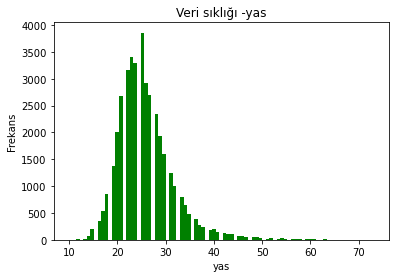

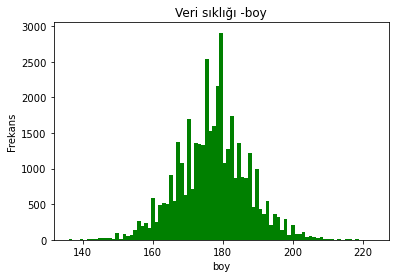

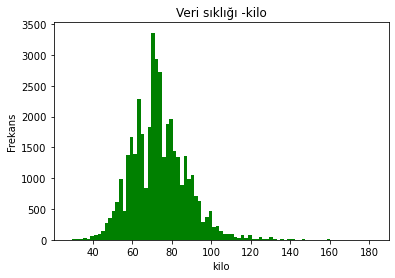

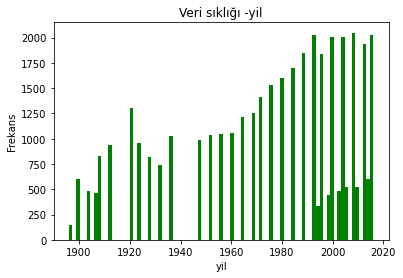

In [24]:
sayisal_degisken=["yas","boy","kilo","yil"]
for i in sayisal_degisken:
    plotHistogram(i)

In [26]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
yas,39783.0,25.918456,5.859569,10.0,22.0,25.00,29.0,73.0
boy,39783.0,177.336690,10.170124,136.0,170.0,177.48,184.0,223.0
kilo,39783.0,73.738320,13.979041,28.0,64.0,73.00,82.0,182.0
yil,39783.0,1973.943845,33.822857,1896.0,1952.0,1984.00,2002.0,2016.0


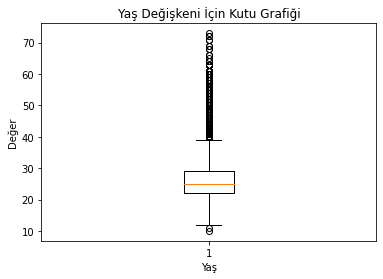

In [30]:
plt.boxplot(veri.yas)
plt.title("Yaş Değişkeni İçin Kutu Grafiği")
plt.xlabel("Yaş")
plt.ylabel("Değer")
plt.show()

## Kategorik Değişkenler

* isim
* cinsiyet
* takim
* uok
* sezon
* sehir
* spor
* etkinlik
* madalya

In [35]:
def plotbar(degisken, n=5):
    """
    Girdi: Değişken/Sütun ismi
           n=Gösterilecek eşsiz değer sayısı
    Çıktı: Çubuk Grafiği
    """
    veri_ =veri[degisken]
    veri_sayma=veri_.value_counts()
    veri_sayma=veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color="orange")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()
    print("{}:\n{}".format(degisken, veri_sayma))


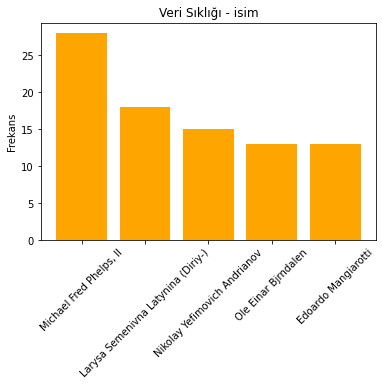

isim:
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: isim, dtype: int64


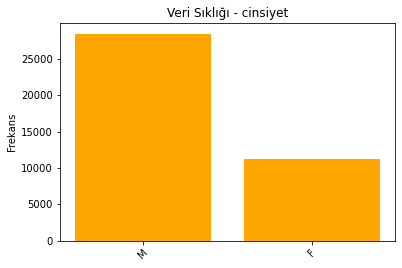

cinsiyet:
M    28530
F    11253
Name: cinsiyet, dtype: int64


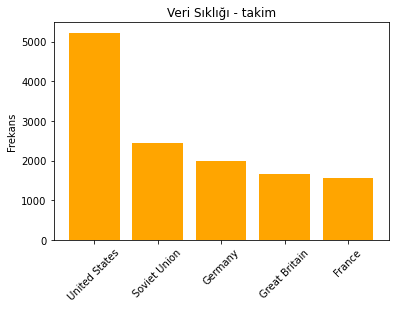

takim:
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takim, dtype: int64


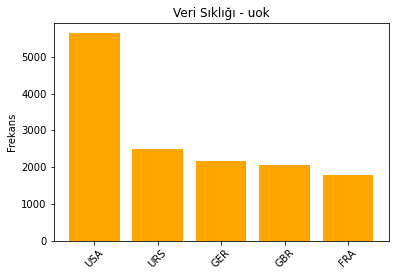

uok:
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: uok, dtype: int64


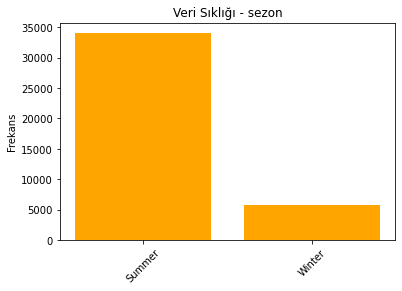

sezon:
Summer    34088
Winter     5695
Name: sezon, dtype: int64


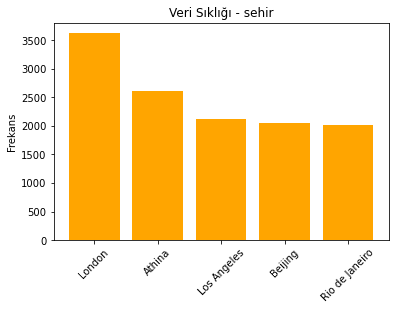

sehir:
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: sehir, dtype: int64


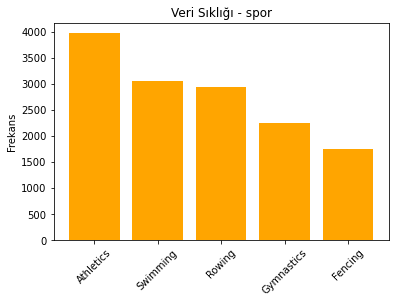

spor:
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


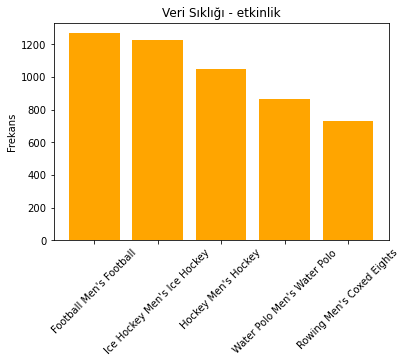

etkinlik:
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


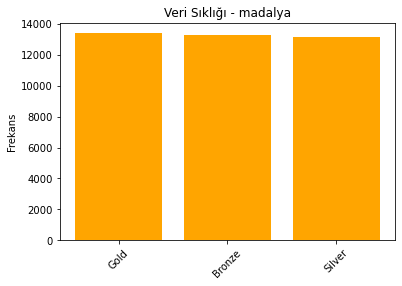

madalya:
Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


In [36]:
kategorik_degisken=["isim","cinsiyet","takim","uok",
                    "sezon","sehir","spor","etkinlik","madalya"
                    ]
for i in kategorik_degisken:
    plotbar(i)                    

## İki Değişkenli Veri Analizi

### Cinsiyete Göre Boy ve Ağırlık Karşılaştırması

In [37]:
erkek =veri[veri.cinsiyet=="M"]
erkek.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [38]:
kadin =veri[veri.cinsiyet=="F"]
kadin.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
161,Patimat Abakarova,F,21.0,165.00,49.00,Azerbaijan,AZE,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
163,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.00,80.00,Russia,RUS,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver


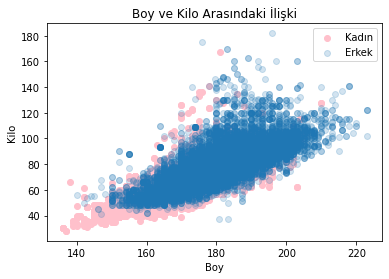

In [46]:
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, alpha=1, label="Kadın", color="pink")
plt.scatter(erkek.boy, erkek.kilo, alpha=0.2, label="Erkek")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

## Sayısal Sütunlar Arasında İlişki İncelemesi

In [47]:
veri.loc[:,["yas","boy","kilo"]].corr()

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


## Madalya ve Yaş Arasındaki İlişki

In [50]:
#sporcuları altın gümüş ve bronz madalyaya göre ayrılması
v_gecici2=veri.copy()
v_gecici2=pd.get_dummies(v_gecici2, columns=["madalya"])#3 sütuna ayırdı
v_gecici2.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0


In [51]:
v_gecici2.loc[:,["yas","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


Takımların Kazandıkları Madalya Sayıları

In [54]:
(v_gecici2[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]]
            .groupby(["takim"], as_index= False)
            .sum()
            .sort_values(by="madalya_Gold", ascending=False)[:10])
#ascending = False; yukarıdan aşağı sırala            

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233.0,2474.0,1512.0
403,Soviet Union,677.0,1058.0,716.0
165,Germany,678.0,679.0,627.0
215,Italy,484.0,535.0,508.0
171,Great Britain,572.0,519.0,582.0
149,France,577.0,455.0,518.0
420,Sweden,507.0,451.0,476.0
198,Hungary,365.0,432.0,330.0
67,Canada,408.0,422.0,413.0
117,East Germany,263.0,369.0,309.0


Kazanılan Madalyaların Hangi Şehirlerde Kazanıldığı

In [55]:
(v_gecici2[["sehir","madalya_Bronze","madalya_Gold","madalya_Silver"]]
                .groupby(["sehir"], as_index= False)
                .sum()
                .sort_values(by="madalya_Gold", ascending=False)[:10])

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214.0,1215.0,1195.0
3,Athina,860.0,883.0,859.0
18,Los Angeles,706.0,726.0,691.0
6,Beijing,710.0,671.0,667.0
27,Rio de Janeiro,703.0,665.0,655.0
38,Sydney,680.0,663.0,661.0
4,Atlanta,629.0,608.0,605.0
5,Barcelona,604.0,559.0,549.0
33,Seoul,549.0,520.0,513.0
2,Antwerpen,367.0,493.0,448.0


Cinsiyete Göre Kazanılan Madalya Sayıları

In [56]:
(v_gecici2[["cinsiyet","madalya_Bronze","madalya_Gold","madalya_Silver"]]
                .groupby(["cinsiyet"], as_index= False)
                .sum()
                .sort_values(by="madalya_Gold", ascending=False)[:10])

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524.0,9625.0,9381.0
0,F,3771.0,3747.0,3735.0


## Çok Değişkenli Veri Analizi

Pivot Tablo

In [58]:
veri_pivot =veri.pivot_table(index="madalya",
                             columns="cinsiyet",
                             values=["boy","kilo","yas"],
                             aggfunc={"boy":np.mean,
                                      "kilo":np.mean,
                                      "yas":[min,max,np.std]})
veri_pivot.head().T

madalya                 Bronze        Gold      Silver
          cinsiyet                                    
boy  mean F         170.003227  170.448727  170.233783
          M         180.045806  180.318906  180.053626
kilo mean F          62.757125   63.199349   62.866892
          M          77.841504   78.186505   77.960887
yas  max  F          69.000000   63.000000   55.000000
          M          72.000000   64.000000   73.000000
     min  F          12.000000   13.000000   11.000000
          M          10.000000   13.000000   13.000000
     std  F           5.329229    5.219615    5.253111
          M           5.870340    5.987807    6.098221

Anamoli Tespiti (Aykırı Değer - IQR)

In [60]:
def anomali(df,ozellik):
    outlier_indices=[]

    for c in ozellik:
        #1. Çeyrek
        Q1 = np.percentile(df[c],25)
        #3. Çeyrek
        Q3 = np.percentile(df[c],75)

        #IQR
        IQR =Q3-Q1
        #Outlier olması için adım miktari
        outlier_step=1.5*IQR
        #IQR değer ve index tespiti
        outlier_list_col=df[ (df[c] < Q1-outlier_step) | (df[c] > Q3+ outlier_step)].index
        #Tespit edilen indexleri depolama
        outlier_indices.extend(outlier_list_col)

    #aykırı değerleri bulalım
    outlier_indices=Counter(outlier_indices) 
    #eğer bir örnek v adet sütunda farklı değer ise bunu aykırı kabul edelim
    multiple_outliers =list(i for i,v in outlier_indices.items() if v>1)
    
    return multiple_outliers       

In [64]:
#Branşlarda aykırı değerler 
veri_anomali = veri.loc[anomali(veri,["yas","kilo","boy"])]
veri_anomali.spor.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: spor, dtype: int64

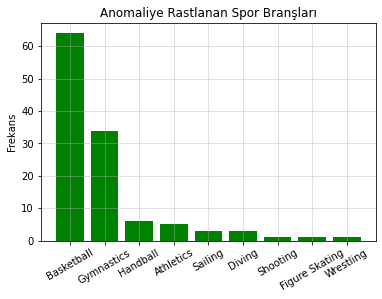

In [68]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index, 
        veri_anomali.spor.value_counts().values, color="green")
plt.xticks(rotation=30)
plt.title("Anomaliye Rastlanan Spor Branşları")
plt.ylabel("Frekans")
plt.grid(True, alpha=0.5)
plt.show()        

In [69]:
veri_gym =veri_anomali[veri.spor=="Gymnastics"]
veri_gym.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold


In [70]:
veri_gym.etkinlik.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: etkinlik, dtype: int64

In [71]:
veri_basketbol =veri_anomali[veri.spor=="Basketball"]
veri_basketbol.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [72]:
veri_basketbol.etkinlik.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: etkinlik, dtype: int64

## Zaman Serilerinde Veri Analizi

In [73]:
veri_zaman =veri.copy()
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [74]:
essiz_yillar=veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [75]:
#olm. yapılan yılların sıralanması
dizili_array=np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

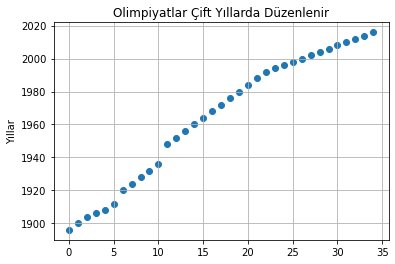

In [76]:
plt.figure()
plt.scatter(range(len(dizili_array)),dizili_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()

In [85]:
#Veri içerisinde bulunan yıl değerlerini datetime tipine dönüştürülmesi
tarih_saat_nesnesi=pd.to_datetime(veri_zaman["yil"],format="%Y")
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head()

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
40   2014-01-01
41   1948-01-01
Name: yil, dtype: datetime64[ns]

In [86]:
veri_zaman["tarih_saat"]=tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [87]:
#Veri_zaman değişkenimin ana indeksini, datetime tipine güncelleme
veri_zaman=veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"], axis=1,inplace=True)
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


## Yıllara göre Ortalama Yaş, Boy ve Kilo

In [89]:
periyodik_veri =(veri_zaman.resample("2A").mean()) 
#2 yıllık periyotlar halinde ortalama değer  
periyodik_veri.head()                      

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823


In [90]:
#kayıp verileri çıkartma
periyodik_veri.dropna(axis=0,inplace=True)
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


### Yıllara göre ortalama

<Figure size 432x288 with 0 Axes>

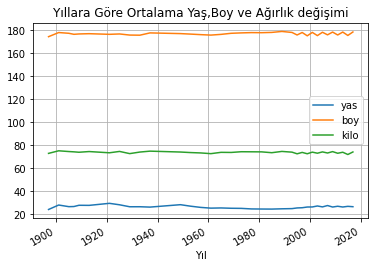

In [94]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara Göre Ortalama Yaş,Boy ve Ağırlık değişimi")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

### Yıllara Göre Madalya Sayıları

In [95]:
veri_zaman=pd.get_dummies(veri_zaman,
                          columns=["madalya"])
veri_zaman.head()                          

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0


In [97]:
periyodik_veri=veri_zaman.resample("2A").sum()
periyodik_veri.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38.0,62.0,43.0
1898-12-31,0.00,0.00,0.00,0.0,0.0,0.0
1900-12-31,16783.16,107440.91,45287.89,175.0,201.0,228.0
1902-12-31,0.00,0.00,0.00,0.0,0.0,0.0
1904-12-31,12812.84,86139.17,36124.78,150.0,173.0,163.0


In [98]:
#Kayıp verilerin çıkarılması
periyodik_veri=periyodik_veri[~(periyodik_veri==0).any(axis=1)]
periyodik_veri.tail()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710.0,671.0,667.0
2010-12-31,13896.0,91395.00,37877.12,171.0,174.0,175.0
2012-12-31,50595.0,346091.47,143102.94,679.0,632.0,630.0
2014-12-31,15907.0,104686.00,42838.63,198.0,202.0,197.0
2016-12-31,53256.0,360846.03,149628.71,703.0,665.0,655.0


<Figure size 432x288 with 0 Axes>

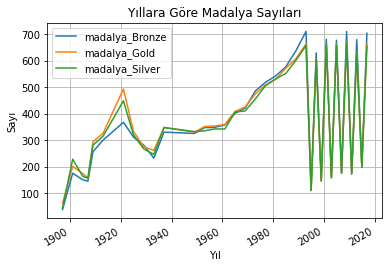

In [99]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

Sezonlara Göre Ayrım

In [100]:
yaz=veri_zaman[veri_zaman.sezon=="Summer"]
kis=veri_zaman[veri_zaman.sezon=="Winter"]
kis.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0
1994-01-01,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,0,0,1
1994-01-01,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,1,0,0


In [102]:
periyodik_veri_kis=kis.resample("A").sum()
periyodik_veri_kis=periyodik_veri_kis[~(periyodik_veri_kis==0).any(axis=1)]
periyodik_veri_kis.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32
1936-12-31,2742.00,19123.20,8101.88,35,36,37
1948-12-31,3643.00,23942.51,10375.92,46,41,48


In [103]:
periyodik_veri_yaz=yaz.resample("A").sum()
periyodik_veri_yaz=periyodik_veri_yaz[~(periyodik_veri_yaz==0).any(axis=1)]
periyodik_veri_yaz.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38.0,62.0,43.0
1900-12-31,16783.16,107440.91,45287.89,175.0,201.0,228.0
1904-12-31,12812.84,86139.17,36124.78,150.0,173.0,163.0
1906-12-31,12127.56,80767.19,33925.06,145.0,157.0,156.0
1908-12-31,22907.96,146806.47,61262.24,256.0,294.0,281.0


<Figure size 432x288 with 0 Axes>

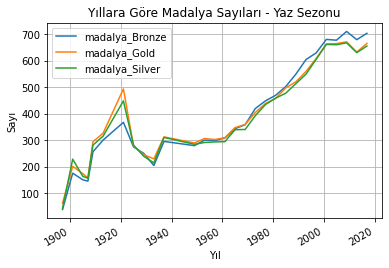

In [104]:
#yıllar sezon
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları - Yaz Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)    
plt.show()                     

<Figure size 432x288 with 0 Axes>

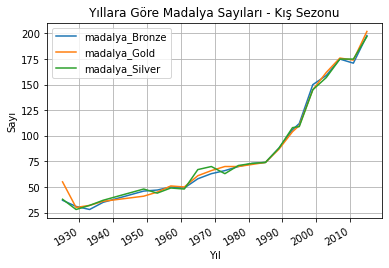

In [105]:
#yıllar sezon
plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları - Kış Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)    
plt.show()     